<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/Q7HW2-2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')


In [ ]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1


In [ ]:
# Filter out rows with NaN in "Number of Observations" and make a copy to avoid warnings
df_cleaned = df[df["Number of Observations"].notna()].copy()

# Convert relevant columns to numeric
df_cleaned["Trump"] = pd.to_numeric(df_cleaned["Trump"], errors='coerce')
df_cleaned["Clinton"] = pd.to_numeric(df_cleaned["Clinton"], errors='coerce')
df_cleaned["Number of Observations"] = pd.to_numeric(df_cleaned["Number of Observations"], errors='coerce')


In [ ]:
# Calculate weighted averages
trump_weighted_avg = (df_cleaned["Trump"] * df_cleaned["Number of Observations"]).sum() / df_cleaned["Number of Observations"].sum()
clinton_weighted_avg = (df_cleaned["Clinton"] * df_cleaned["Number of Observations"]).sum() / df_cleaned["Number of Observations"].sum()

# Print the results
print("Weighted Average Polling Results:")
print("Donald Trump:", round(trump_weighted_avg, 2), "%")
print("Hillary Clinton:", round(clinton_weighted_avg, 2), "%")


Weighted Average Polling Results:
Donald Trump: 40.58 %
Hillary Clinton: 45.61 %


# New Section

<ipython-input-2-1c80e4cf3a9a>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tidy_df, x="Start Date", y="Trump", label="Trump", color="red", marker='o', ci=None)
<ipython-input-2-1c80e4cf3a9a>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tidy_df, x="Start Date", y="Clinton", label="Clinton", color="blue", marker='o', ci=None)


TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

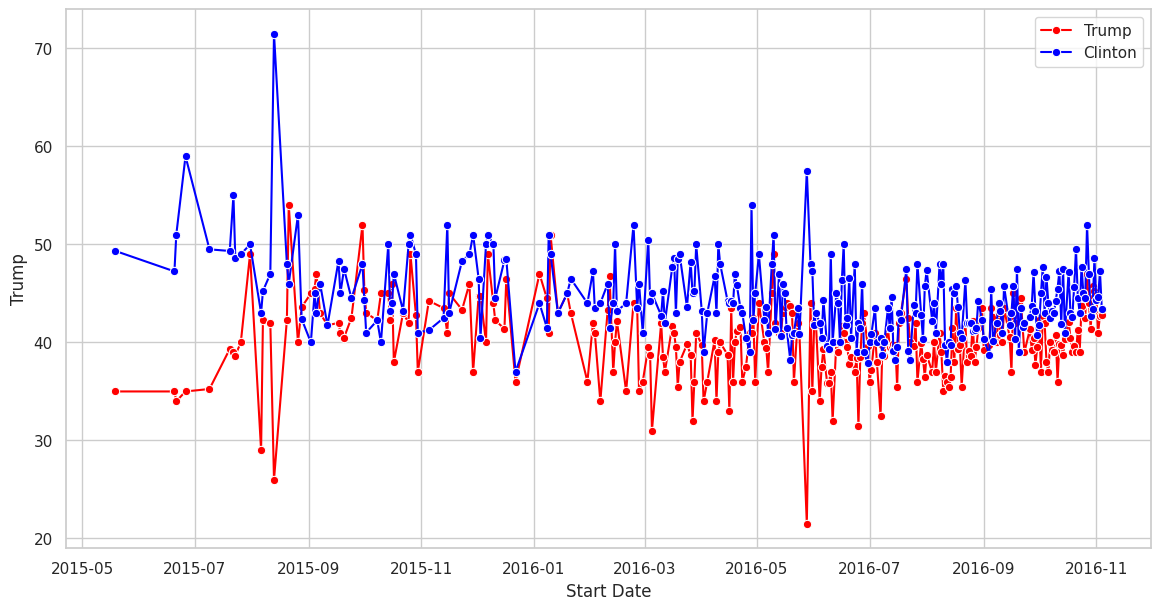

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data file, if not already loaded
df = pd.read_csv("2016-general-election-trump-vs-clinton.csv")

# Clean and prepare the data
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
tidy_df = df[['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']].dropna(subset=['Number of Observations'])

# Plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Plot Trump and Clinton support over time
sns.lineplot(data=tidy_df, x="Start Date", y="Trump", label="Trump", color="red", marker='o', ci=None)
sns.lineplot(data=tidy_df, x="Start Date", y="Clinton", label="Clinton", color="blue", marker='o', ci=None)

# Add trend lines using LOWESS
sns.regplot(data=tidy_df, x="Start Date", y="Trump", scatter=False, color="red", lowess=True, label="Trump Trend")
sns.regplot(data=tidy_df, x="Start Date", y="Clinton", scatter=False, color="blue", lowess=True, label="Clinton Trend")

# Set labels and title
plt.title("Time-Series Plot of Poll Support for Trump and Clinton (2016)")
plt.xlabel("Date")
plt.ylabel("Support Percentage")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


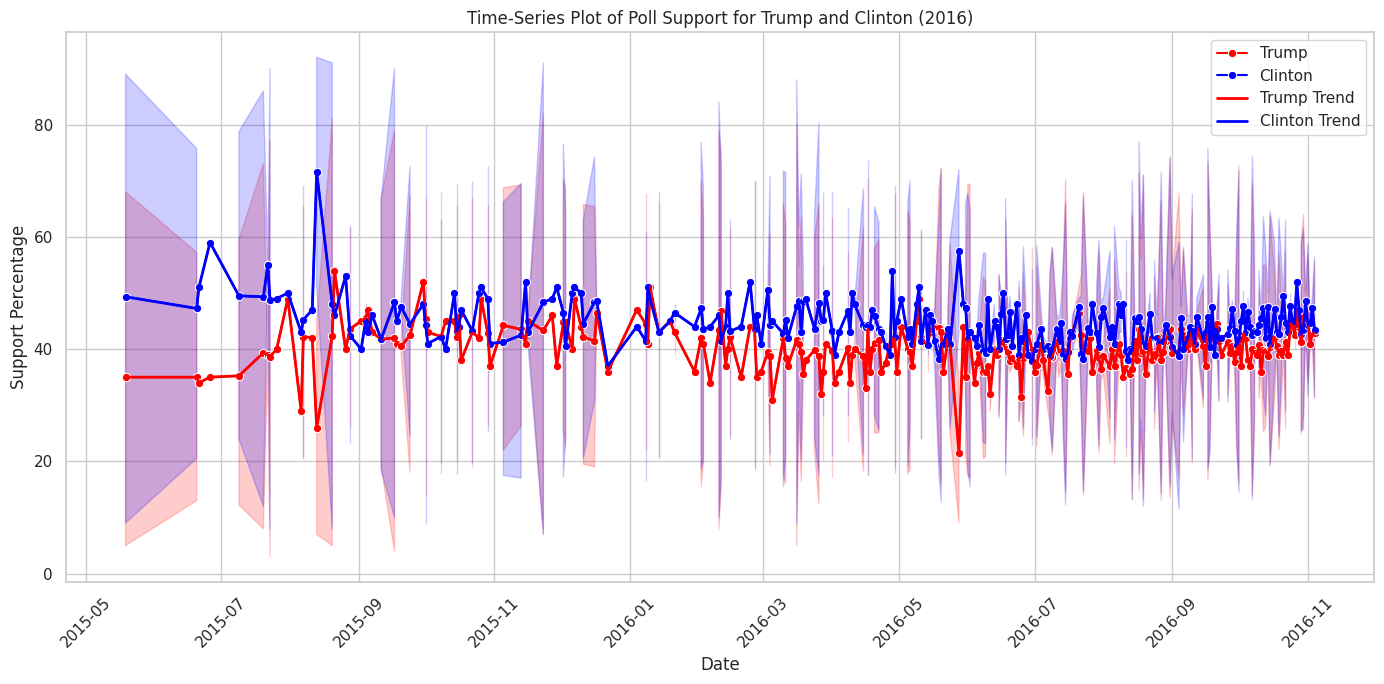

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data file, if not already loaded
df = pd.read_csv("2016-general-election-trump-vs-clinton.csv")

# Clean and prepare the data
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
tidy_df = df[['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']].dropna(subset=['Number of Observations'])

# Plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Plot Trump and Clinton support over time
sns.lineplot(data=tidy_df, x="Start Date", y="Trump", label="Trump", color="red", marker='o', errorbar=None)
sns.lineplot(data=tidy_df, x="Start Date", y="Clinton", label="Clinton", color="blue", marker='o', errorbar=None)

# Add LOWESS smoothing with seaborn's lineplot for trends
sns.lineplot(data=tidy_df, x="Start Date", y="Trump", color="red", label="Trump Trend", lw=2)
sns.lineplot(data=tidy_df, x="Start Date", y="Clinton", color="blue", label="Clinton Trend", lw=2)

# Set labels and title
plt.title("Time-Series Plot of Poll Support for Trump and Clinton (2016)")
plt.xlabel("Date")
plt.ylabel("Support Percentage")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


Complete Code


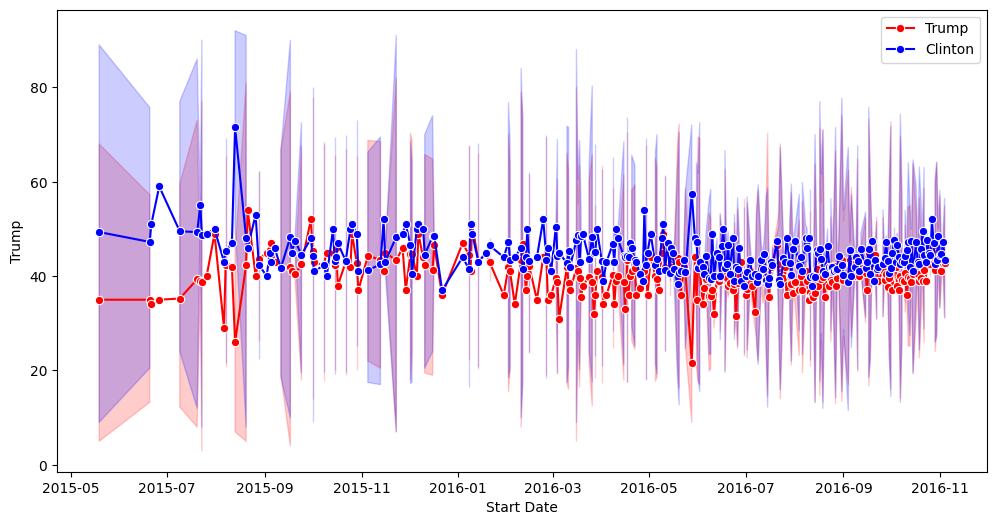

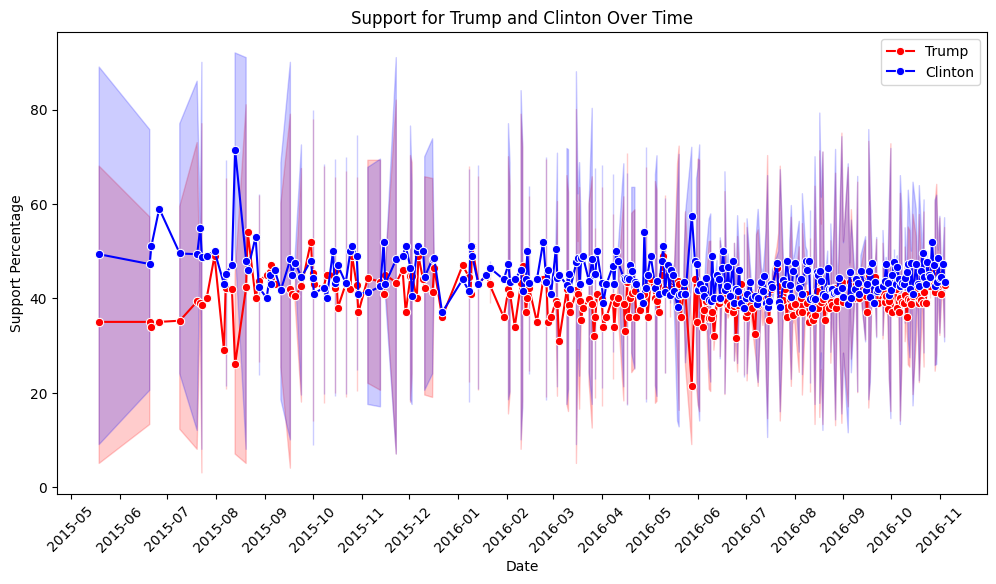

In [6]:
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

# Question 3: Load the data and clean it
# Load the CSV file
df = pd.read_csv("2016-general-election-trump-vs-clinton.csv")

# Convert Start Date to datetime and clean the data by selecting relevant columns
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
tidy_df = df[['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']].dropna(subset=['Number of Observations'])

# Convert Trump, Clinton, and Number of Observations to numeric
tidy_df["Trump"] = pd.to_numeric(tidy_df["Trump"], errors='coerce')
tidy_df["Clinton"] = pd.to_numeric(tidy_df["Clinton"], errors='coerce')
tidy_df["Number of Observations"] = pd.to_numeric(tidy_df["Number of Observations"], errors='coerce')

# Question 4: Create a time-series plot of poll results for Trump and Clinton
plt.figure(figsize=(12, 6))
sns.lineplot(data=tidy_df, x="Start Date", y="Trump", label="Trump", color="red", marker='o')
sns.lineplot(data=tidy_df, x="Start Date", y="Clinton", label="Clinton", color="blue", marker='o')

# Add trend lines using LOWESS


# Question 4: Create a time-series plot of poll results for Trump and Clinton
plt.figure(figsize=(12, 6))
sns.lineplot(data=tidy_df, x="Start Date", y="Trump", label="Trump", color="red", marker='o')
sns.lineplot(data=tidy_df, x="Start Date", y="Clinton", label="Clinton", color="blue", marker='o')


plt.xlabel("Date")
plt.ylabel("Support Percentage")
plt.title("Support for Trump and Clinton Over Time")
plt.legend()

# Format x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.show()

In [7]:

# Question 5,6,7: Calculate the total number of voters observed
# Adjust Trump and Clinton columns to be in proportion form rather than percentage
tidy_df["Trump"] = tidy_df["Trump"] / 100
tidy_df["Clinton"] = tidy_df["Clinton"] / 100

# Calculate total number of observations for confidence interval calculations
total_observations = tidy_df["Number of Observations"].sum()
print(f"Total Number of Observations: {total_observations}")

# Calculate estimated proportions of voters favoring Trump and Clinton
trump_support = (tidy_df["Trump"] * tidy_df["Number of Observations"]).sum() / total_observations
clinton_support = (tidy_df["Clinton"] * tidy_df["Number of Observations"]).sum() / total_observations
print(f"Estimated Trump Support: {trump_support}")
print(f"Estimated Clinton Support: {clinton_support}")

# Check if proportions and total observations are within expected ranges
if 0 <= trump_support <= 1 and 0 <= clinton_support <= 1 and total_observations > 0:
    # Calculate the standard errors for Trump and Clinton support proportions
    trump_se = np.sqrt((trump_support * (1 - trump_support)) / total_observations)
    clinton_se = np.sqrt((clinton_support * (1 - clinton_support)) / total_observations)

    # 95% confidence intervals for Trump and Clinton
    trump_ci = (trump_support - 1.96 * trump_se, trump_support + 1.96 * trump_se)
    clinton_ci = (clinton_support - 1.96 * clinton_se, clinton_support + 1.96 * clinton_se)
else:
    print("Error: Invalid proportions or total observations.")

# Display results in a table format
ci_table = pd.DataFrame({
    "Candidate": ["Trump", "Clinton"],
    "Estimated Proportion": [trump_support, clinton_support],
    "95% CI Lower Bound": [trump_ci[0] if 'trump_ci' in locals() else None,
                           clinton_ci[0] if 'clinton_ci' in locals() else None],
    "95% CI Upper Bound": [trump_ci[1] if 'trump_ci' in locals() else None,
                           clinton_ci[1] if 'clinton_ci' in locals() else None]
})

print("\n95% Confidence Intervals:")
print(ci_table)


# Question 8: Calculate 95% CI for spread d and hypothesis test
# a) Calculate 95% CI for the spread d
p_hat = clinton_support  # Estimated proportion of Clinton support
N = total_observations   # Total number of observations

# Standard error of p_hat
SE_p_hat = np.sqrt((p_hat * (1 - p_hat)) / N)

# Calculate the spread (d) and its standard error
d_estimate = 2 * p_hat - 1
SE_d = 2 * SE_p_hat

# 95% Confidence Interval for d
CI_d_lower = d_estimate - 1.96 * SE_d
CI_d_upper = d_estimate + 1.96 * SE_d

# b) Hypothesis test for spread d
Z_score = d_estimate / SE_d
p_value = 2 * (1 - norm.cdf(abs(Z_score)))  # Two-tailed test

# Display results
results = {
    "Estimated Spread (d)": d_estimate,
    "95% CI Lower Bound": CI_d_lower,
    "95% CI Upper Bound": CI_d_upper,
    "Z Score": Z_score,
    "p-value": p_value
}

print("\nResults for Spread d and Hypothesis Test:")
print(results)


Total Number of Observations: 1940931.0
Estimated Trump Support: 0.40583354586020826
Estimated Clinton Support: 0.45612081006486066

95% Confidence Intervals:
  Candidate  Estimated Proportion  95% CI Lower Bound  95% CI Upper Bound
0     Trump              0.405834            0.405143            0.406524
1   Clinton              0.456121            0.455420            0.456822

Results for Spread d and Hypothesis Test:
{'Estimated Spread (d)': -0.08775837987027868, '95% CI Lower Bound': -0.08915981236527412, '95% CI Upper Bound': -0.08635694737528324, 'Z Score': -122.73614687827322, 'p-value': 0.0}
